In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,validation_curve,GridSearchCV
import optuna
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Avijit\Desktop\AgriAssure\CROP_RECOMMENDATION\PROCESS_DATASET\crop_recommendation_processed.csv")

In [40]:
x,y=data.iloc[:,:-1],data['label']

In [41]:
y.shape

(2200,)

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [87]:
params = {
        'C': np.logspace(-4, 2, 10) ,  # use suggest_float instead of deprecated 
        'solver': ['liblinear', 'saga'],
        'penalty':  ['l1', 'l2'],
        'max_iter': [50],
        'random_state': [42]
    }
grid=GridSearchCV(estimator=model,param_grid=params,cv=KFold(n_splits=5),scoring='accuracy')
grid.fit(x,y)

c:\Users\Avijit\anaconda3\envs\DL\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Avijit\anaconda3\envs\DL\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Avijit\anaconda3\envs\DL\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Avijit\anaconda3\envs\DL\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Avijit\anaconda3\envs\DL\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Avijit\anaconda3\envs\DL\lib\site-packages\sklearn\svm\_

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
                         'max_iter': [50], 'penalty': ['l1', 'l2'],
                         'random_state': [42],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [93]:
grid.best_params_

{'C': np.float64(21.54434690031882),
 'max_iter': 50,
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'saga'}

In [96]:
params=grid.best_params_
model=LogisticRegression(**params)
model.fit(x,y)

c:\Users\Avijit\anaconda3\envs\DL\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=np.float64(21.54434690031882), max_iter=50, penalty='l1',
                   random_state=42, solver='saga')

In [97]:
model.score(xtrain,ytrain)*100


98.69318181818181

In [ ]:
degrees = np.arange(1, 21)
train_score, val_score = validation_curve(
    model,
    X=x,
    y=y.ravel(),  
    param_name='C',
    param_range=degrees,
    scoring='accuracy',
    cv=5  
)

train_mean = train_score.mean(axis=1)
val_mean = val_score.mean(axis=1)

C:\Users\Avijit\AppData\Local\Temp\ipykernel_10496\556608734.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y=y.ravel(),  # <- IMPORTANT: reshape to 1D if y is (2200, 1)
c:\Users\Avijit\anaconda3\envs\DL\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Avijit\anaconda3\envs\DL\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Avijit\anaconda3\envs\DL\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Avijit\anaconda3\envs\DL\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means 

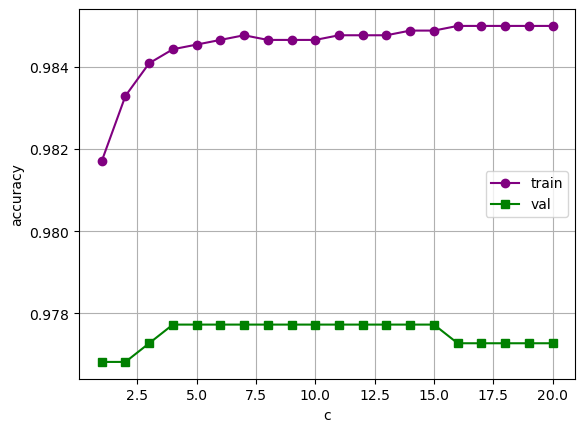

In [101]:
plt.plot(degress,trainmean,label='training score',marker='o',color='purple')
plt.plot(degress,valmean,label='test score',marker='s',color='green')
plt.xlabel("c")
plt.ylabel("accuracy")
plt.grid()
plt.legend(['train','val'])
plt.show()

In [102]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [126]:
cls=pd.read_csv(r"C:\Users\Avijit\Desktop\AgriAssure\CROP_RECOMMENDATION\DATASET\Crop_recommendation.csv")

In [131]:
classes=cls['label'].unique().tolist()

In [116]:
ypred=model.predict(xtest)

In [122]:
cm=confusion_matrix(ytest,ypred)

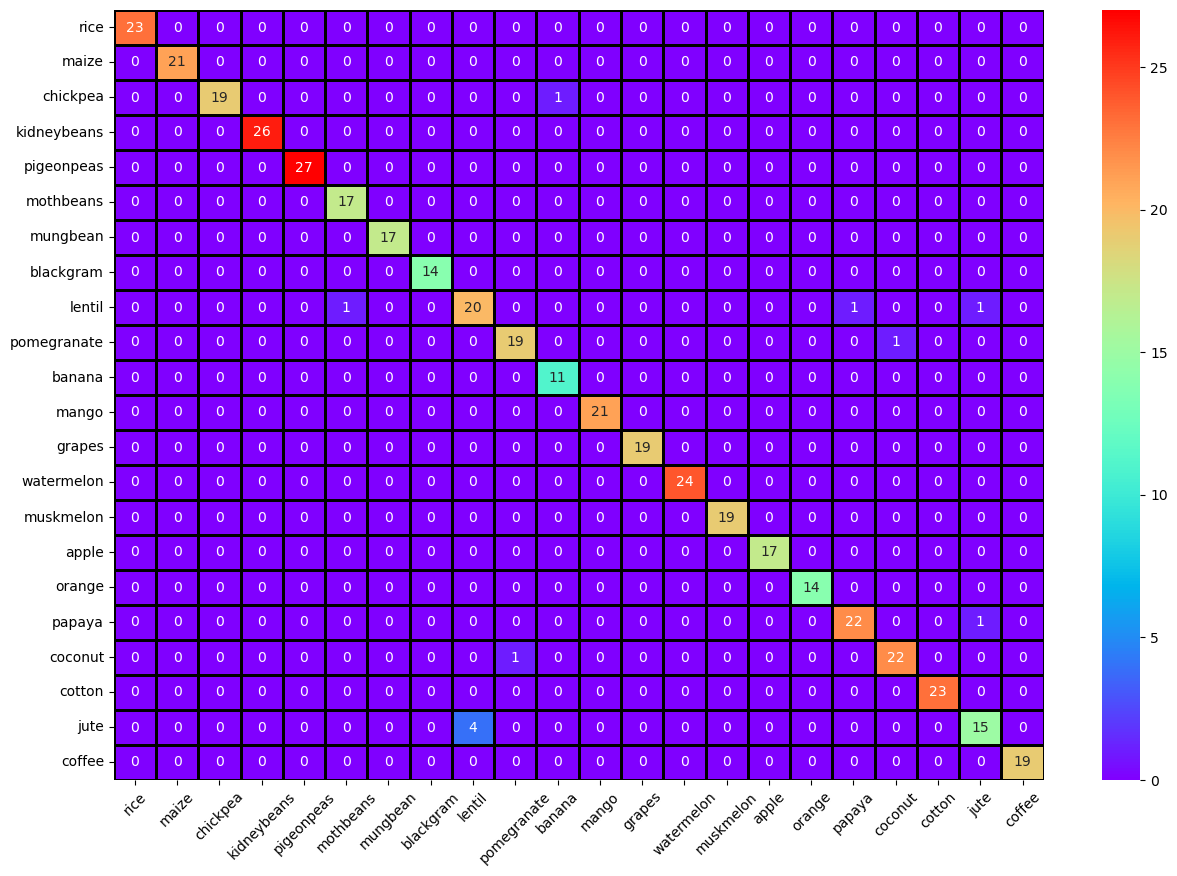

In [143]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='d',cmap=plt.cm.rainbow,xticklabels=classes,yticklabels=classes,linecolor='Black',linewidths=0.8)
plt.xticks(rotation=45)
plt.show()

In [145]:
metric=['Accuracy','Precision','Recall','F1 score']
score=[accuracy_score(ytest,ypred),precision_score(ytest,ypred,average='macro'),recall_score(ytest,ypred,average='macro'),f1_score(ytest,ypred,average='macro')]
score=[s*100 for s in score]

In [164]:
model.score(xtest,ytest)*100

97.5

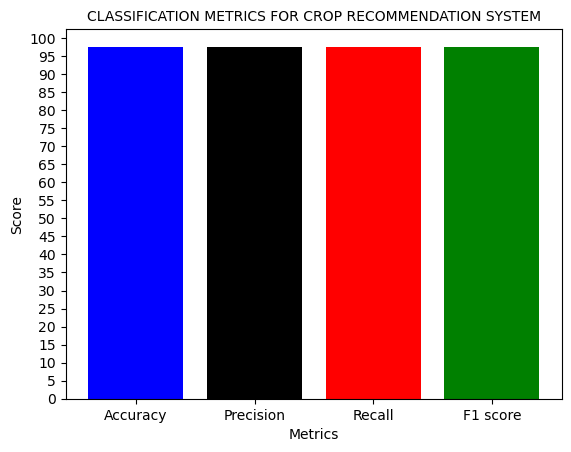

In [149]:
plt.bar(metric,score,color=['blue','black','red','green'])
plt.xlabel('Metrics')
plt.ylabel("Score")
plt.title("CLASSIFICATION METRICS FOR CROP RECOMMENDATION SYSTEM",fontsize=10)
plt.yticks(range(0,101,5))
plt.show()

In [156]:
import joblib as jb
jb.dump(model,r"C:\Users\Avijit\Desktop\AgriAssure\CROP_RECOMMENDATION\MODELS\logistic.pkl")

['C:\\Users\\Avijit\\Desktop\\AgriAssure\\CROP_RECOMMENDATION\\MODELS\\logistic.pkl']